In [1]:
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from math import sqrt
from sklearn import preprocessing

import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
%matplotlib inline

Seasons = pd.read_csv('Seasons.csv')
Teams = pd.read_csv('Teams.csv')

rs_Compact = pd.read_csv('RegularSeasonCompactResults.csv')
rs_Detailed = pd.read_csv('RegularSeasonDetailedResults.csv')

t_Compact = pd.read_csv('TourneyCompactResults.csv')
t_Detailed = pd.read_csv('TourneyDetailedResults.csv')
t_Slots = pd.read_csv('TourneySlots.csv')
t_Seeds = pd.read_csv('TourneySeeds.csv')

team_spellings = pd.read_csv('TeamSpellings.csv')
# massey = pd.read_csv('massey_ordinals.csv')
ken_pom = pd.read_csv('kenpom.csv')
MMM_2 = pd.read_csv('MMM_2.csv')
Matchup = pd.read_csv('Matchup.csv')
Matchup_KP = pd.read_csv('Matchup_KP.csv')

In [2]:
Matchup_KP.head()

,Unnamed: 0,Year,Daynum,WinLoss,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,...,Luck,Luck Rank,SOS Pyth,SOS Pyth Rank,SOS OppO,SOS OppO Rank,SOS OppD,SOS OppD Rank,NCSOS Pyth,NCSOS Pyth Rank
0,0,2003,134,1,1421,92,1411,84,N,1,...,0.080,-68,0.1820,-81,4.3,-73,-3.3,-99,0.4070,-285
1,1,2003,137,0,1421,61,1400,82,N,0,...,0.127,-182,-0.3352,232,-6.7,231,5.7,207,0.1601,-79
2,2,2003,144,0,1163,78,1400,82,N,0,...,0.013,-33,-0.0248,16,0.7,-12,1.6,45,-0.1416,130
3,3,2003,146,0,1277,76,1400,85,N,0,...,-0.041,91,-0.0029,2,0.2,-4,0.3,5,0.0259,-22
4,4,2003,139,0,1345,67,1400,77,N,0,...,-0.004,10,-0.0085,6,0.7,-13,0.9,20,0.0486,-42


In [3]:
def score_model(model, parameters, X_train, y_train, X_test, y_test):
    m = model()
    m = GridSearchCV(m, parameters, cv=3)
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    return m, score, m.best_params_

## Logistic Regression (Kaggle Pure Stats Only)

In [4]:
y = Matchup.WinLoss
# features = ['WWins', 'WLosses', 'WFieldGoalAvg', 'WThreePointAvg', 'WFreeThrowAvg', 'WReboundAvg', 'WAssistAvg', 'WTurnOverAvg', 'WStealAvg', 'WBlockAvg', 'WPersonalFoulAvg', 'LWins', 'LLosses', 'LFieldGoalAvg', 'LThreePointAvg', 'LFreeThrowAvg', 'LReboundAvg', 'LAssistAvg', 'LTurnOverAvg', 'LStealAvg', 'LBlockAvg', 'LPersonalFoulAvg', 'AvgPointSpread', 'Wins', 'Losses', 'FieldGoalAvg', 'ThreePointAvg', 'FreeThrowAvg', 'ReboundAvg', 'AssistAvg', 'TurnOverAvg', 'StealAvg', 'BlockAvg', 'PersonalFoulAvg']
features = ['Wins', 'Losses', 'FieldGoalAvg', 'ThreePointAvg', 'FreeThrowAvg', 'ReboundAvg', 'AssistAvg', 'TurnOverAvg', 'StealAvg', 'BlockAvg', 'PersonalFoulAvg']
X = Matchup[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.67678571428571432

In [5]:
p = {'penalty':['l1', 'l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver':['liblinear']}
m, s, p = score_model(linear_model.LogisticRegression, p, X_train, y_train, X_test, y_test)
print('Logistic Regression Score: ', s)
print('Parameters', p)

Logistic Regression Score:  0.669642857143
Parameters {'solver': 'liblinear', 'penalty': 'l1', 'C': 100}


## Logistic Regression (Kaggle Pure Stats + Ken Pom)

In [6]:
y = Matchup_KP.WinLoss
# features = ['WWins', 'WLosses', 'WFieldGoalAvg', 'WThreePointAvg', 'WFreeThrowAvg', 'WReboundAvg', 'WAssistAvg', 'WTurnOverAvg', 'WStealAvg', 'WBlockAvg', 'WPersonalFoulAvg', 'LWins', 'LLosses', 'LFieldGoalAvg', 'LThreePointAvg', 'LFreeThrowAvg', 'LReboundAvg', 'LAssistAvg', 'LTurnOverAvg', 'LStealAvg', 'LBlockAvg', 'LPersonalFoulAvg', 'AvgPointSpread', 'Wins', 'Losses', 'FieldGoalAvg', 'ThreePointAvg', 'FreeThrowAvg', 'ReboundAvg', 'AssistAvg', 'TurnOverAvg', 'StealAvg', 'BlockAvg', 'PersonalFoulAvg']
features = ['FieldGoalAvg', 'ThreePointAvg', 'FreeThrowAvg', 'ReboundAvg', 'AssistAvg', 'TurnOverAvg', 'StealAvg', 'BlockAvg', 'PersonalFoulAvg', 'Pyth', 'Rank', 'AdjustO', 'AdjustO Rank', 'AdjustD', 'AdjustD Rank', 'AdjustT', 'AdjustT Rank', 'Luck', 'Luck Rank']
X = Matchup_KP[features]
X_norm = preprocessing.normalize(X, norm = 'l2')

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.33, random_state = 42)

model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.75587703435804698

In [7]:
p = {'penalty':['l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000, 5000, 10000], 'solver':['liblinear']}
m, s, p = score_model(linear_model.LogisticRegression, p, X_train, y_train, X_test, y_test)
print('Logistic Regression Score: ', s)
print('Parameters', p)
coef = [abs(x) for x in m.best_estimator_.coef_]
print('coefs', zip(features, *coef))

Logistic Regression Score:  0.772151898734
Parameters {'solver': 'liblinear', 'penalty': 'l2', 'C': 2000}
coefs <zip object at 0x000001BC9640A588>


[array([  2.11253192e-01,   1.18716178e+00,   1.42648116e-01,
         8.28868825e+00,   1.57027377e+01,   1.80399744e+01,
         1.07139686e+00,   2.26335986e+01,   1.38589070e+01,
         1.42704838e-02,   1.31686690e+00,   3.78439191e+01,
         4.08334896e-01,   1.94941669e+01,   1.35893861e+00,
         1.69851573e+01,   6.20045249e-01,   8.51706481e-01,
         8.37231603e-01])]
feature_importance [  5.58222289e-01   3.13699482e+00   3.76938011e-01   2.19022988e+01
   4.14934237e+01   4.76694139e+01   2.83109383e+00   5.98077556e+01
   3.66212257e+01   3.77087895e-02   3.47973183e+00   1.00000000e+02
   1.07899738e+00   5.15120192e+01   3.59090347e+00   4.48821310e+01
   1.63842769e+00   2.25057685e+00   2.21232796e+00]
sorted_idx [ 9  2  0 12 16 18 17  6  1 10 14  3  8  4 15  5 13  7 11]
features ['FieldGoalAvg', 'ThreePointAvg', 'FreeThrowAvg', 'ReboundAvg', 'AssistAvg', 'TurnOverAvg', 'StealAvg', 'BlockAvg', 'PersonalFoulAvg', 'Pyth', 'Rank', 'AdjustO', 'AdjustO Rank', '

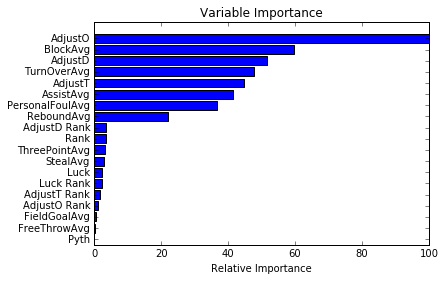

In [8]:
feature_importance = np.asarray(*coef)
print(coef)
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
print('feature_importance', feature_importance)
sorted_idx = np.argsort(feature_importance)
print('sorted_idx', sorted_idx)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure()
plt.subplot(1,1,1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, features[sorted_idx])
print('features', features)
plt.yticks(pos, [features[x] for x in sorted_idx])
print(list(features[x] for x in sorted_idx))

plt.xlabel('Relative Importance')
plt.title('Variable Importance')

## Logistic Regression (Kaggle Pure Stats + Ken Pom - Ranks)

In [9]:
y = Matchup_KP.WinLoss
# features = ['WWins', 'WLosses', 'WFieldGoalAvg', 'WThreePointAvg', 'WFreeThrowAvg', 'WReboundAvg', 'WAssistAvg', 'WTurnOverAvg', 'WStealAvg', 'WBlockAvg', 'WPersonalFoulAvg', 'LWins', 'LLosses', 'LFieldGoalAvg', 'LThreePointAvg', 'LFreeThrowAvg', 'LReboundAvg', 'LAssistAvg', 'LTurnOverAvg', 'LStealAvg', 'LBlockAvg', 'LPersonalFoulAvg', 'AvgPointSpread', 'Wins', 'Losses', 'FieldGoalAvg', 'ThreePointAvg', 'FreeThrowAvg', 'ReboundAvg', 'AssistAvg', 'TurnOverAvg', 'StealAvg', 'BlockAvg', 'PersonalFoulAvg']
features = ['FieldGoalAvg', 'ThreePointAvg', 'FreeThrowAvg', 'ReboundAvg', 'AssistAvg', 'TurnOverAvg', 'StealAvg', 'BlockAvg', 'PersonalFoulAvg', 'Pyth', 'Rank', 'AdjustO', 'AdjustD', 'AdjustT', 'Luck']
X = Matchup_KP[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.75045207956600357

In [10]:
p = {'penalty':['l1', 'l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver':['liblinear']}
m, s, p = score_model(linear_model.LogisticRegression, p, X_train, y_train, X_test, y_test)
print('Logistic Regression Score: ', s)
print('Parameters', p)

Logistic Regression Score:  0.783001808318
Parameters {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}


## Logistic Regression (Ken Pom + Kaggle Pure Stats)

In [11]:
y = Matchup_KP.WinLoss
# features = ['WWins', 'WLosses', 'WFieldGoalAvg', 'WThreePointAvg', 'WFreeThrowAvg', 'WReboundAvg', 'WAssistAvg', 'WTurnOverAvg', 'WStealAvg', 'WBlockAvg', 'WPersonalFoulAvg', 'LWins', 'LLosses', 'LFieldGoalAvg', 'LThreePointAvg', 'LFreeThrowAvg', 'LReboundAvg', 'LAssistAvg', 'LTurnOverAvg', 'LStealAvg', 'LBlockAvg', 'LPersonalFoulAvg', 'AvgPointSpread', 'Wins', 'Losses', 'FieldGoalAvg', 'ThreePointAvg', 'FreeThrowAvg', 'ReboundAvg', 'AssistAvg', 'TurnOverAvg', 'StealAvg', 'BlockAvg', 'PersonalFoulAvg']
features = ['FieldGoalAvg', 'ThreePointAvg', 'FreeThrowAvg', 'ReboundAvg', 'AssistAvg', 'TurnOverAvg', 'StealAvg', 'BlockAvg', 'PersonalFoulAvg', 'Pyth', 'Rank', 'AdjustO', 'AdjustO Rank', 'AdjustD', 'AdjustD Rank', 'AdjustT', 'AdjustT Rank', 'Luck', 'Luck Rank']
X = Matchup_KP[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.79746835443037978

In [12]:
p = {'penalty':['l1', 'l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver':['liblinear']}
m, s, p = score_model(linear_model.LogisticRegression, p, X_train, y_train, X_test, y_test)
print('Logistic Regression Score: ', s)
print('Parameters', p)

Logistic Regression Score:  0.801084990958
Parameters {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01}


In [13]:
m.predict_proba(X_test)

array([[ 0.32577126,  0.67422874],
       [ 0.52429514,  0.47570486],
       [ 0.12420625,  0.87579375],
       ..., 
       [ 0.68287953,  0.31712047],
       [ 0.34388469,  0.65611531],
       [ 0.06553082,  0.93446918]])

## Regressor Ensemble w/Gradient Boosting

MSE: 0.1735
['FieldGoalAvg', 'ThreePointAvg', 'FreeThrowAvg', 'ReboundAvg', 'AssistAvg', 'TurnOverAvg', 'StealAvg', 'BlockAvg', 'PersonalFoulAvg', 'Pyth', 'Rank', 'AdjustO', 'AdjustO Rank', 'AdjustD', 'AdjustD Rank', 'AdjustT', 'AdjustT Rank', 'Luck', 'Luck Rank']
[  14.9588758     7.95931135    8.31610638   17.61162491   28.82019844
    9.99841917   14.14159376   22.66072134   11.67096927  100.
   20.89628997   40.00787812   19.99771504   17.66300879   12.03371557
    6.9418125    23.42077958   29.23585865   28.00518778]
[15  1  2  5  8 14  6  0  3 13 12 10  7 16 18  4 17 11  9]
[(0, 'BlockAvg'), (1, 'ThreePointAvg'), (2, 'FreeThrowAvg'), (3, 'PersonalFoulAvg'), (4, 'AdjustT'), (5, 'ReboundAvg'), (6, 'StealAvg'), (7, 'AdjustO Rank'), (8, 'AssistAvg'), (9, 'Luck Rank'), (10, 'AdjustO'), (11, 'Luck'), (12, 'Rank'), (13, 'Pyth'), (14, 'TurnOverAvg'), (15, 'FieldGoalAvg'), (16, 'AdjustD'), (17, 'AdjustT Rank'), (18, 'AdjustD Rank')]


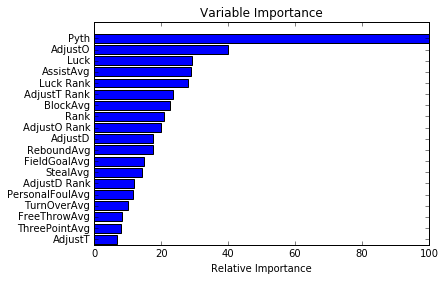

In [18]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

###############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

X = Matchup_KP[features]
X_norm = preprocessing.normalize(X, norm = 'l2')

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.33, random_state = 42)

model.fit(X_train, y_train)
mse = mean_squared_error(y_test, model.predict(X_test))
print("MSE: %.4f" % mse)

###############################################################################
# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
print(features)
print(feature_importance)
sorted_idx = np.argsort(feature_importance)
print(sorted_idx)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure()
plt.subplot(1,1,1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, features[sorted_idx])
# plt.yticks(pos, [x for (y, x) in sorted(zip(sorted_idx, features))])
plt.yticks(pos, [features[x] for x in sorted_idx])
print(sorted(zip(sorted_idx, features)))

plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()